##### Wednesday the 11th of September, 2024
# Performance Comparison of Machine Learning Classification Models for Credit Card Fraud Detection

---

## Introduction
### Background

Among the largest expenses for credit card issuers are investments in fraud detection and prevention measures, due to the ever-evolving nature of credit card fraud. Nonetheless, the high costs are necessary to reduce financial losses, protect customer trust, and maintain security and regulatory compliance. One way such companies may reduce fraud-related expenses and improve customer trust is by detecting fraudulent transactions as early as possible, ideally in real-time. 
 
Employing machine learning to address this problem could reduce operational costs by automating fraud prevention, and preventing the escalation of fraud patterns, ultimately ensuring a more secure and efficient system.


### Objective

The goal of this project is to develop a machine learning classification model to predict whether credit card transactions are fraudulent, based on a number of transaction attributes. We will train and compare various machine learning classification models to determine which is optimal for credit card fraud detection. The model types to be compared are Logistic Regression, K Nearest Neighbours, Support Vector Machines, Decision Tree, and Random Forest.

----
## Dataset description
The [Credit Card Fraud Detection](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023) dataset used in this project contains credit card transaction records for European customers in 2023. It comprises over 550,000 records and 28 transaction attributes (e.g., transaction type, merchant name, location, time) rendered anonymous by principal component analysis (PCA) transformation. Each transaction is labeled as either fraudulent (1) or non-fraudulent (0), which facilitates the training and evaluation of fraud detection systems.

The data source is not disclosed to protect cardholder privacy and confidentiality.

---
## Import Python Modules

First, we import the libraries/modules that will be used in this project:

- pandas
- numpy
- matplotlib
- seaborn
- Scikit-learn

In [1]:
# Import required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

---
## Load the Data

Let's start by loading the dataset `creditcard_2023.csv` into a dataframe and previewing the first 5 rows of data.

In [2]:
data = pd.read_csv("creditcard_2023.csv")
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


We will sample a subset from the dataset, as it is too resource-intensive to perform hyperparameter tuning on the dataset with >500,000 entries. We do this using the Pandas `.sample()` method with a value of `frac = 0.1`, which specifies that we take a random sample constituting 10% of the original dataset.

In [3]:
data = data.sample(frac=0.1, random_state=8)

We also drop the `id` column from the dataframe as it is not significant for this analysis.

In [4]:
data = data.drop(columns="id")

### Summary Statistics

Now, we will return summary statistics for our data set

First, the count, mean, standard deviation, minimum, maximum, and 25th, 50th, and 75th percentiles of all variables:

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,...,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000,56863.000000
mean,0.000911,-0.001277,-0.000448,0.002208,0.003560,0.009690,-0.000167,-0.014126,0.000017,-0.001812,...,-0.004177,0.003414,0.011063,0.002034,-0.006283,0.001404,-0.003454,-0.001046,12032.063550,0.502119
std,0.998242,1.001308,0.996455,1.001218,0.985193,0.997412,0.957995,0.989199,1.005235,1.000096,...,1.024954,1.014040,1.009048,0.996969,0.997187,1.001051,0.995272,0.977078,6905.313257,0.500000
min,-2.796779,-40.194965,-2.578182,-4.795050,-4.298320,-10.559457,-4.351839,-6.535574,-3.748442,-3.163276,...,-12.170779,-6.838888,-21.504910,-3.995989,-9.719067,-8.226969,-5.672326,-15.445771,50.010000,0.000000
25%,-0.567430,-0.485827,-0.648903,-0.655060,-0.292397,-0.439008,-0.282507,-0.193234,-0.564832,-0.584072,...,-0.167977,-0.487004,-0.234681,-0.642972,-0.557772,-0.634779,-0.304979,-0.230994,6076.885000,0.000000
50%,-0.093062,-0.134289,-0.002142,-0.070069,0.080902,0.082674,0.233287,-0.115544,0.089299,0.256953,...,-0.038551,-0.024088,-0.058226,0.016352,-0.007635,-0.008434,-0.173794,-0.011809,12015.810000,1.000000
75%,0.831693,0.344621,0.623933,0.714933,0.444298,0.501646,0.525433,0.043944,0.556619,0.590480,...,0.145605,0.465418,0.158745,0.695637,0.549102,0.676781,0.335091,0.408125,17978.050000,1.000000
max,2.164795,4.361865,4.396339,3.201536,20.509163,9.295606,37.922674,5.956390,9.069232,14.280317,...,8.087080,9.762960,26.190808,10.820906,10.458350,5.555557,22.915024,36.105635,24039.550000,1.000000


Let's look at the column names and data type of each column in our data frame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56863 entries, 128926 to 310494
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56863 non-null  float64
 1   V2      56863 non-null  float64
 2   V3      56863 non-null  float64
 3   V4      56863 non-null  float64
 4   V5      56863 non-null  float64
 5   V6      56863 non-null  float64
 6   V7      56863 non-null  float64
 7   V8      56863 non-null  float64
 8   V9      56863 non-null  float64
 9   V10     56863 non-null  float64
 10  V11     56863 non-null  float64
 11  V12     56863 non-null  float64
 12  V13     56863 non-null  float64
 13  V14     56863 non-null  float64
 14  V15     56863 non-null  float64
 15  V16     56863 non-null  float64
 16  V17     56863 non-null  float64
 17  V18     56863 non-null  float64
 18  V19     56863 non-null  float64
 19  V20     56863 non-null  float64
 20  V21     56863 non-null  float64
 21  V22     56863 non-null  float64
 2

Now, let's verify there are no missing values in our data:

In [7]:
data.isna().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

---
## Exploratory Data Analysis

### Distributions of Features
To visualize the distribution of each feature, we plot a histogram matrix as we have only numeric features
#### Plotting Histogram Matrix

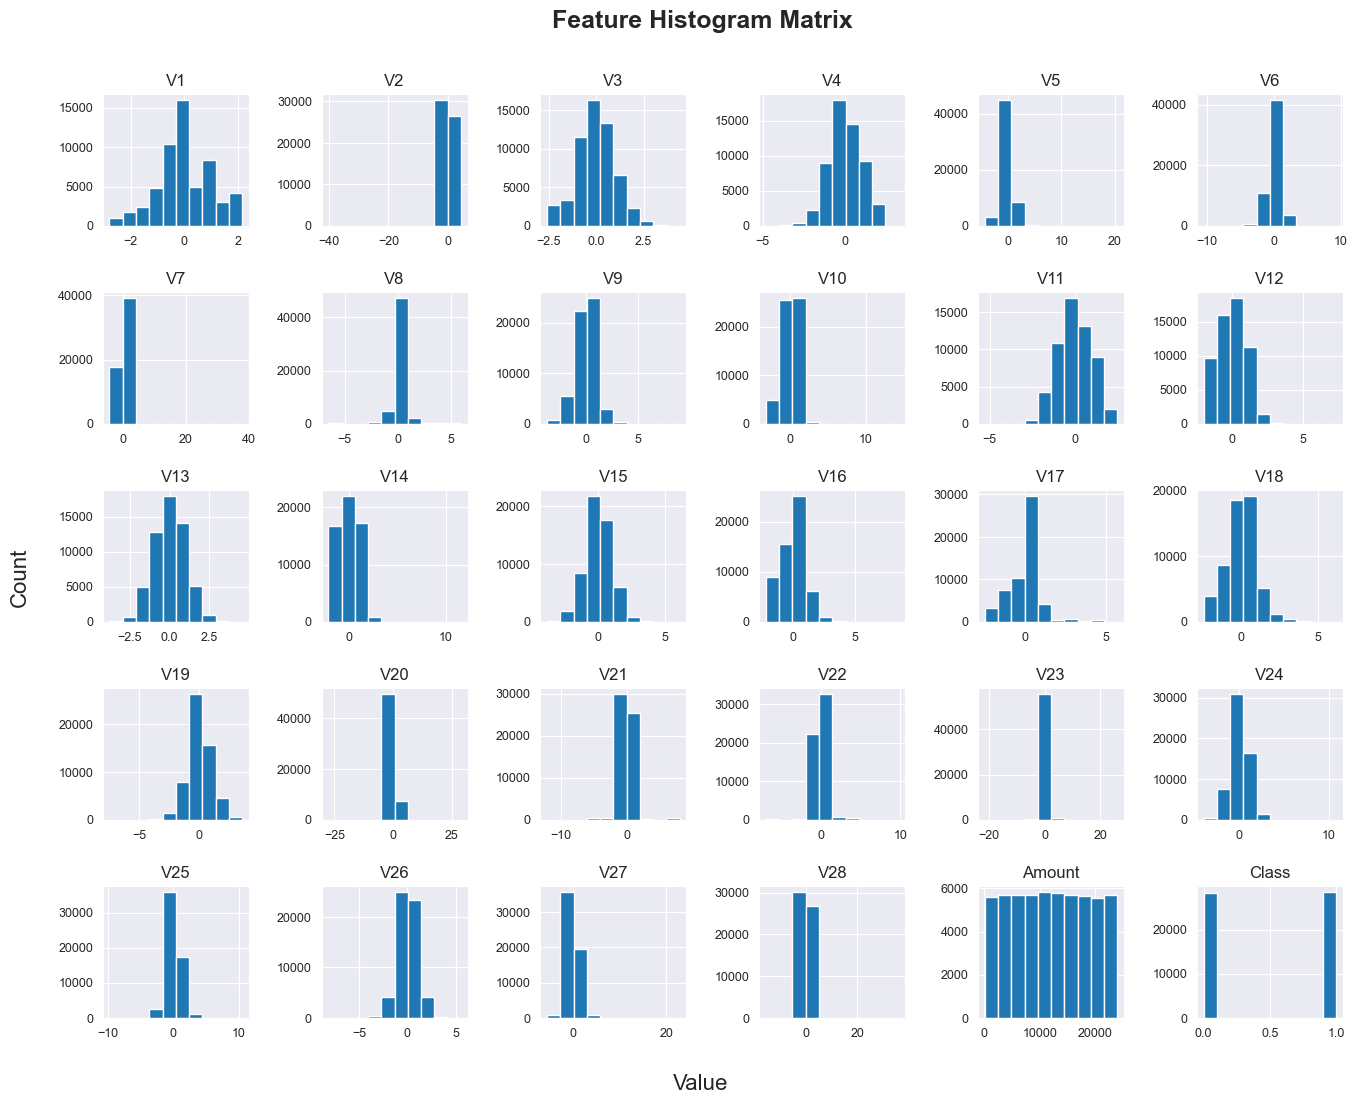

In [8]:
# Creating numeric feature data frame and list
features = data
features_list = list(features)
# Creating histogram grid
features.hist(figsize=(16, 12), layout=(5, 6), xlabelsize=9, ylabelsize=9)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Feature Histogram Matrix", fontsize=18, fontweight="bold", y=0.95)
plt.text(-9, 100000, "Count", ha="left", va="center", rotation="vertical", fontsize=16)
plt.text(
    -4, -15000, "Value", ha="left", va="center", rotation="horizontal", fontsize=16
);

### Distribution of Target
To get an idea of the distribution of the target variable, we first use the `value_counts()` method to return the count of each category. To visualize the distribution, we plot a countplot, which shows the count of both genuine and fraudulent transactions in the dataset.

In [9]:
data["Class"].value_counts()

Class
1    28552
0    28311
Name: count, dtype: int64

#### Plotting the Target Distribution

C:\Users\noah8\AppData\Local\Temp\ipykernel_17180\3463099390.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set(


Text(0, 0.5, 'Count')

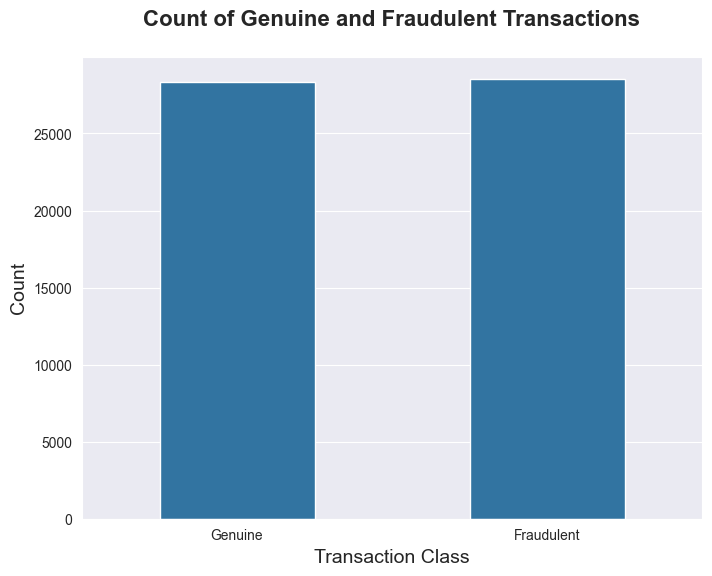

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plot = sns.countplot(data, x="Class", width=0.5)
plot.set(
    xticklabels=["Genuine", "Fraudulent"],
    title="Count of Genuine and Fraudulent Transactions",
)
plt.title(
    "Count of Genuine and Fraudulent Transactions",
    fontsize=16,
    fontweight="bold",
    y=1.05,
)
plt.xlabel("Transaction Class", fontsize=14)
plt.ylabel("Count", fontsize=14)

As evident in the above plot, the target variable is balanced with 284,315 genuine transactions and 284,315 fraudulent transactions.

---
## Feature Engineering and Variable Transformation
### Train/Test Split
Before doing any feature engineering or variable transformation, we first split the data frame into two: a training split and a test split. Splitting the data before pre-processing eliminates the possibility of data leakage.

In [11]:
X = data.drop(columns="Class")
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

### Feature Scaling

In [12]:
scaler = StandardScaler()

X_train.iloc[:, 0:29] = scaler.fit_transform(X_train.iloc[:, 0:29])
X_test.iloc[:, 0:29] = scaler.fit_transform(X_test.iloc[:, 0:29])

---
## Model Development


### Logistic Regression Model

In [13]:
# Create logistic regression model
lr = LogisticRegression(random_state=8).fit(X_train, y_train)
lr_score = pd.DataFrame(cross_validate(lr, X_train, y_train, cv=5, return_train_score=True))
print("Mean Logistic Regression Cross-Validation Scores:")
lr_score.mean()


Mean Logistic Regression Cross-Validation Scores:


fit_time       0.043551
score_time     0.001902
test_score     0.965861
train_score    0.966273
dtype: float64

### Linear Support Vector Classification Model

In [14]:
# Create linear SVC model
sv = LinearSVC(C=0.001, random_state=8, dual="auto").fit(X_train, y_train)
sv_score = pd.DataFrame(cross_validate(sv, X_train, y_train, cv=5, return_train_score=True))
print("Mean Linear SVC Cross-Validation Scores:")
sv_score.mean()

Mean Linear SVC Cross-Validation Scores:


fit_time       0.062159
score_time     0.001914
test_score     0.958101
train_score    0.958090
dtype: float64

### Random Forest Model

In [15]:
# Create Random Forest model
rf = RandomForestClassifier(n_estimators = 50, max_depth=10, max_features = 0.2).fit(X_train, y_train)
rf_score = pd.DataFrame(cross_validate(rf, X_train, y_train, cv=5, n_jobs=-1, return_train_score=True))
print("Mean Random Forest Cross-Validation Scores:")
rf_score.mean()

Mean Random Forest Cross-Validation Scores:


fit_time       5.635853
score_time     0.018312
test_score     0.983865
train_score    0.988168
dtype: float64

---
## Preliminary Score Comparison

Below, we compare the training scores for the three models trained in the previous section

In [16]:
scores_comp = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "Linear SVC", "Random Forest"],
        "Training Score": [
            lr_score["train_score"].mean(),
            sv_score["train_score"].mean(),
            rf_score["train_score"].mean(),
        ],
        "Test Score": [
            lr_score["test_score"].mean(),
            sv_score["test_score"].mean(),
            rf_score["test_score"].mean(),
        ],
    }
)
scores_comp

,Model,Training Score,Test Score
0,Logistic Regression,0.966273,0.965861
1,Linear SVC,0.958090,0.958101
2,Random Forest,0.988168,0.983865


In terms of training score, the ***Random Forest Classifier model is the best-performing***, followed by the Logistic Regression model, then the Linear SVC model. The same trend is seen in comparison of the models' test scores. However, while the Logistic Regression and Random Forest models exhibit lower test scores than their respective training scores, the Linear SVC model scores better on the test set than the training set. This could suggest that the Linear SVC model is slightly underfitting; while the opposite could be said for the Logistic Regression and Random Forest models. 

---
# Discussion
The Random Forest Classifier model is well-suited for the object of distinguishing between genuiune and fraudulent credit card transactions, both in terms of explainability and predictability. The model has robust predictive power, and while other models (e.g., Decision Tree) may outbid the Random Forest Classifier in terms of explainability, this is not of concern in this application as the results are not necessarily to be interpreted by, or presented to shareholders and the public and are rather intended to serve the company as internal metrics. 

The next step in the analysis of this data is to perform hyperparameter tuning on the Random Forest Classifier model to optimize its performance. Either GridSearchCV or RandomizedSearchCV would be suitable to do this; however, RandomizedSearchCV may be preferable as it is typically more efficient, and the initial dataset has a very large number of entries.